In [66]:
import tensorflow as tf
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [6]:
tf.__version__

'1.2.0'

In [2]:
sess = tf.InteractiveSession()

In [8]:
#  tf.convert_to_tensor

g = tf.convert_to_tensor(['abc', 'def', 'ghi'])

sess.run(g)

array([b'abc', b'def', b'ghi'], dtype=object)

In [10]:
# tf.train.slice_input_producer

help(tf.train.slice_input_producer)

g = tf.constant(['abc', 'def', 'ghi'])
f = tf.constant([1,2,3,])

gg, ff = tf.train.slice_input_producer([g, f], num_epochs=3, shuffle=True)

reader = tf.IdentityReader()

sess.run([reader.read(gg), reader.read(ff)])

Help on function slice_input_producer in module tensorflow.python.training.input:

slice_input_producer(tensor_list, num_epochs=None, shuffle=True, seed=None, capacity=32, shared_name=None, name=None)
    Produces a slice of each `Tensor` in `tensor_list`.
    
    Implemented using a Queue -- a `QueueRunner` for the Queue
    is added to the current `Graph`'s `QUEUE_RUNNER` collection.
    
    Args:
      tensor_list: A list of `Tensor` objects. Every `Tensor` in
        `tensor_list` must have the same size in the first dimension.
      num_epochs: An integer (optional). If specified, `slice_input_producer`
        produces each slice `num_epochs` times before generating
        an `OutOfRange` error. If not specified, `slice_input_producer` can cycle
        through the slices an unlimited number of times.
      shuffle: Boolean. If true, the integers are randomly shuffled within each
        epoch.
      seed: An integer (optional). Seed used if shuffle == True.
      capacity: An

TypeError: Input 'queue_handle' of 'ReaderReadV2' Op has type string that does not match expected type of resource.

Help on function stft in module librosa.core.spectrum:

stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=<class 'numpy.complex64'>, pad_mode='reflect')
    Short-time Fourier transform (STFT)
    
    Returns a complex-valued matrix D such that
        `np.abs(D[f, t])` is the magnitude of frequency bin `f`
        at frame `t`
    
        `np.angle(D[f, t])` is the phase of frequency bin `f`
        at frame `t`
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)], real-valued
        the input signal (audio time series)
    
    n_fft : int > 0 [scalar]
        FFT window size
    
    hop_length : int > 0 [scalar]
        number audio of frames between STFT columns.
        If unspecified, defaults `win_length / 4`.
    
    win_length  : int <= n_fft [scalar]
        Each frame of audio is windowed by `window()`.
        The window will be of length `win_length` and then padded
        with zeros to match `n_fft`.
    
        I

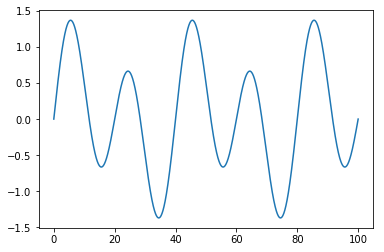

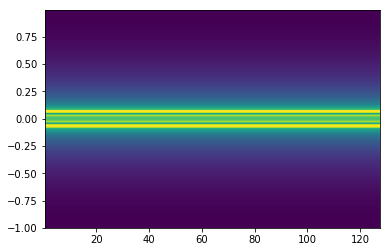

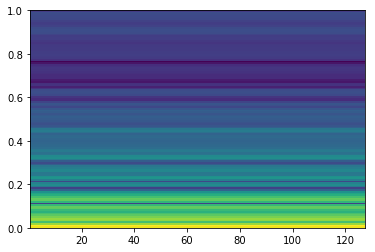

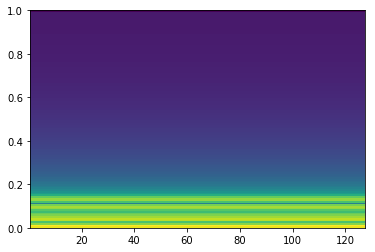

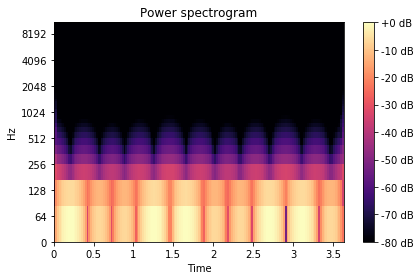

In [73]:
# librosa.stft

help(librosa.stft)

x = np.linspace(0, 100, 10000)
y = 0.5*np.sin(0.05*np.pi*x) + np.sin(0.1*np.pi*x)

plt.plot(x, y)
plt.show()

sampling_rate = 2
n_fft = 256

D = librosa.stft(y, n_fft=n_fft)

magnitude_spectrogram = np.abs(D)

power_spectrogram = magnitude_spectrogram**2

plt.specgram(D, n_fft, sampling_rate, noverlap=2)
plt.show()
plt.specgram(magnitude_spectrogram, n_fft, sampling_rate, noverlap=2)
plt.show()
plt.specgram(power_spectrogram, n_fft, sampling_rate, noverlap=2)
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

Help on function melspectrogram in module librosa.feature.spectral:

melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, power=2.0, **kwargs)
    Compute a mel-scaled spectrogram.
    
    If a spectrogram input `S` is provided, then it is mapped directly onto
    the mel basis `mel_f` by `mel_f.dot(S)`.
    
    If a time-series input `y, sr` is provided, then its magnitude spectrogram
    `S` is first computed, and then mapped onto the mel scale by
    `mel_f.dot(S**power)`.  By default, `power=2` operates on a power spectrum.
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)] or None
        audio time-series
    
    sr : number > 0 [scalar]
        sampling rate of `y`
    
    S : np.ndarray [shape=(d, t)]
        spectrogram
    
    n_fft : int > 0 [scalar]
        length of the FFT window
    
    hop_length : int > 0 [scalar]
        number of samples between successive frames.
        See `librosa.core.stft`
    
    power : float > 0 [scalar

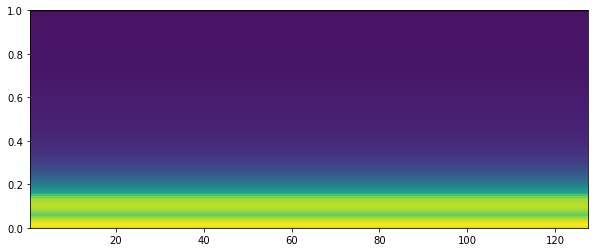

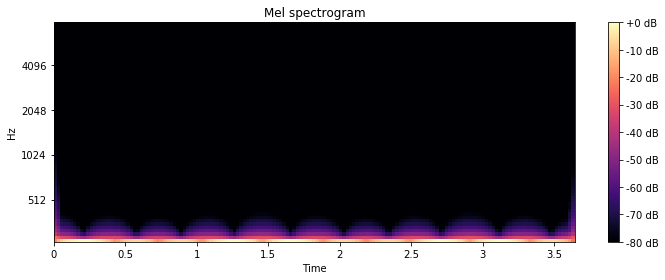

In [68]:
# librosa.feature.melspectrogram

help(librosa.feature.melspectrogram)

mel_spectrogram = librosa.feature.melspectrogram(sr=sampling_rate, S=power_spectrogram, n_fft=n_fft, n_mels=80, hop_length=n_fft//4)

plt.specgram(mel_spectrogram, n_fft, sampling_rate, noverlap=2)
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()